In [96]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [97]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Preprocessing Data

### Handle NaN values

In [98]:
df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean(), inplace=True)
df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean(), inplace=True)

### Data Transformation

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.fit_transform(df_test[col])

### Data Normalization


In [100]:
from sklearn.preprocessing import MinMaxScaler

X_train = np.array(df_train.iloc[:, 1:-1])
y_train = np.array(df_train.iloc[:, -1])
X_test = np.array(df_test.iloc[:, 1:-1])
y_test = np.array(df_test.iloc[:, -1])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Naive Bayes

In [101]:
from sklearn.metrics import classification_report


### GaussianNB

In [102]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14573
           1       0.88      0.80      0.84     11403

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976



### BernoulliNB

In [103]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

model = BernoulliNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     14573
           1       0.73      0.80      0.76     11403

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976



### MultinomialNB

In [104]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     14573
           1       0.79      0.78      0.78     11403

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



### ComplementNB

In [105]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     14573
           1       0.75      0.82      0.79     11403

    accuracy                           0.80     25976
   macro avg       0.80      0.81      0.80     25976
weighted avg       0.81      0.80      0.80     25976



### CategoricalNB

In [106]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     14573
           1       0.75      0.82      0.79     11403

    accuracy                           0.80     25976
   macro avg       0.80      0.81      0.80     25976
weighted avg       0.81      0.80      0.80     25976



## Compare Model Naive Bayes

MultinomialNB Accuracy: 0.8103
GaussianNB Accuracy: 0.8618
BernoulliNB Accuracy: 0.7787
ComplementNB Accuracy: 0.8029


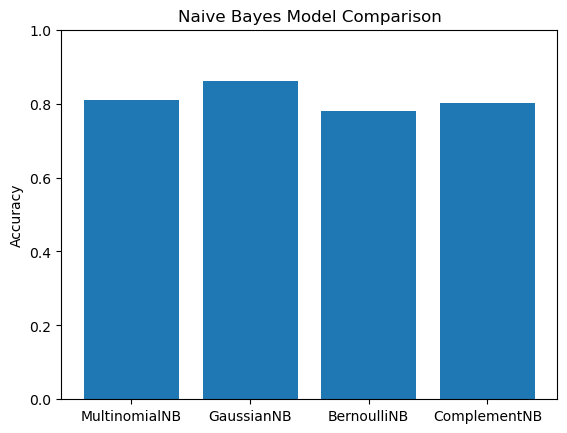

In [108]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score

models = [MultinomialNB(), GaussianNB(), BernoulliNB(), ComplementNB()]
model_names = ['MultinomialNB', 'GaussianNB', 'BernoulliNB', 'ComplementNB']

accuracies = {}

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel('Accuracy')
plt.title('Naive Bayes Model Comparison')
plt.ylim(0, 1)
plt.show()


# Neurual Network

In [109]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [110]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
2923/2923 [==============================] - 3s 1ms/step - loss: 0.2315 - accuracy: 0.9066 - val_loss: 0.1644 - val_accuracy: 0.9285
Epoch 2/10
2923/2923 [==============================] - 3s 1ms/step - loss: 0.1508 - accuracy: 0.9381 - val_loss: 0.1289 - val_accuracy: 0.9456
Epoch 3/10
2923/2923 [==============================] - 3s 969us/step - loss: 0.1334 - accuracy: 0.9453 - val_loss: 0.1152 - val_accuracy: 0.9551
Epoch 4/10
2923/2923 [==============================] - 3s 1ms/step - loss: 0.1238 - accuracy: 0.9483 - val_loss: 0.1085 - val_accuracy: 0.9550
Epoch 5/10
2923/2923 [==============================] - 3s 974us/step - loss: 0.1181 - accuracy: 0.9498 - val_loss: 0.1012 - val_accuracy: 0.9610
Epoch 6/10
2923/2923 [==============================] - 3s 964us/step - loss: 0.1132 - accuracy: 0.9513 - val_loss: 0.0984 - val_accuracy: 0.9580
Epoch 7/10
2923/2923 [==============================] - 3s 957us/step - loss: 0.1098 - accuracy: 0.9534 - val_loss: 0.0974 - val_a

In [112]:
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, to_categorical(predicted_classes, num_classes=2)))

812/812 [==============================] - 1s 671us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

   micro avg       0.96      0.96      0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 samples avg       0.96      0.96      0.96     25976



812/812 - 1s - loss: 78753.7578 - accuracy: 0.5622 - 561ms/epoch - 690us/step


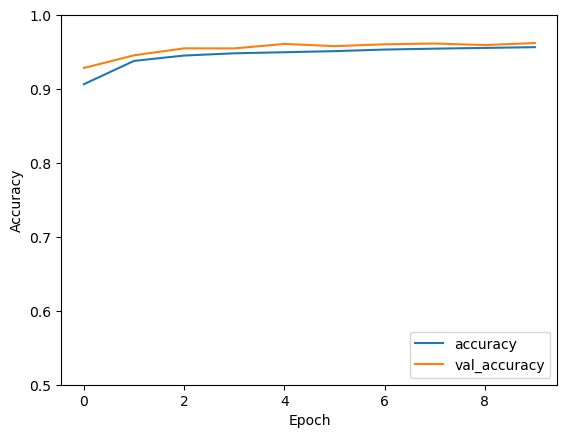

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)